In [130]:
import numpy as np                               
import pandas as pd                             
import matplotlib.pyplot as plt                 
%matplotlib inline                               
import seaborn as sns                           
pd.set_option("display.max_rows",None)           
pd.set_option("display.max_columns",None)       
import warnings                                  
warnings.filterwarnings('ignore') 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [131]:
df=pd.read_csv("h1n1_vaccine_prediction.csv")

In [132]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [133]:
df.describe(include="all")

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26707,25300,26707,26707,22284,25299,24665,25244,26707,26458.000000,26458.000000,26707.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,4,2,3,2,2,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6843,10097,21222,15858,12777,13555,18736,13560,11645,NaN,NaN,NaN
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000


In [134]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

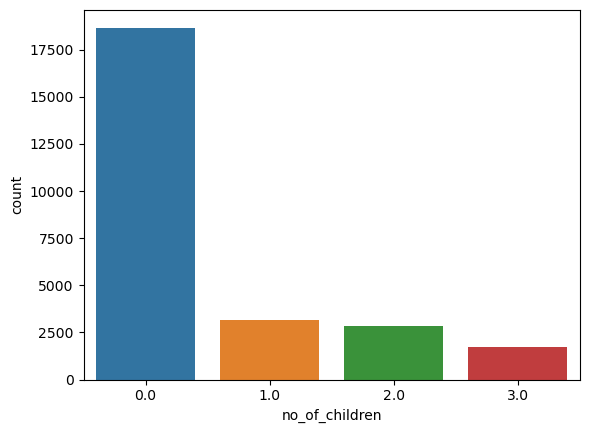

In [135]:
sns.countplot(x="no_of_children",data=df)
plt.show()

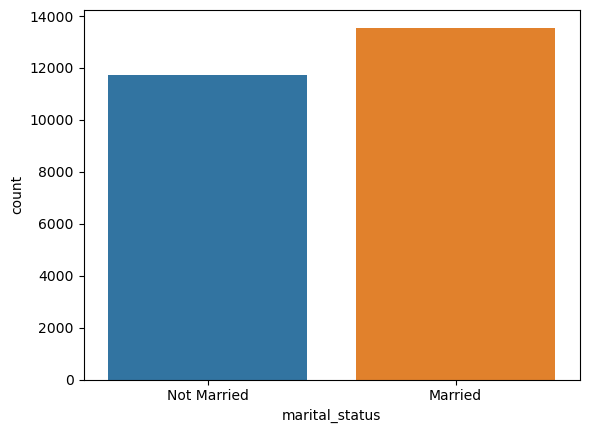

In [136]:
sns.countplot(x="marital_status",data=df)
plt.show()

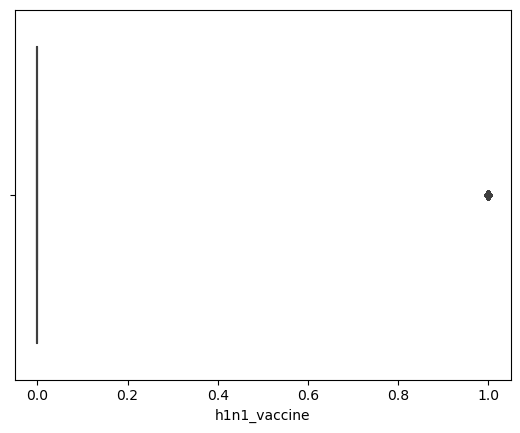

In [137]:
sns.boxplot(x="h1n1_vaccine",data=df)
plt.show()

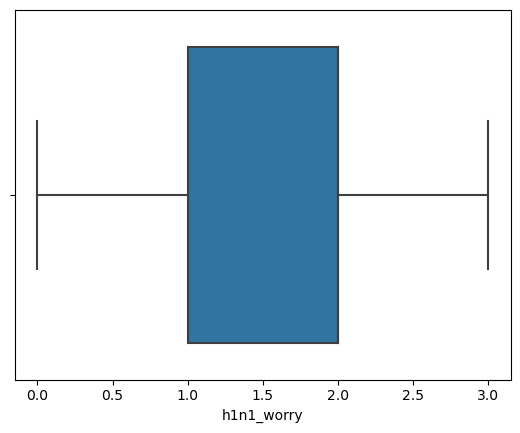

In [138]:
sns.boxplot(x="h1n1_worry",data=df)
plt.show()

In [139]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


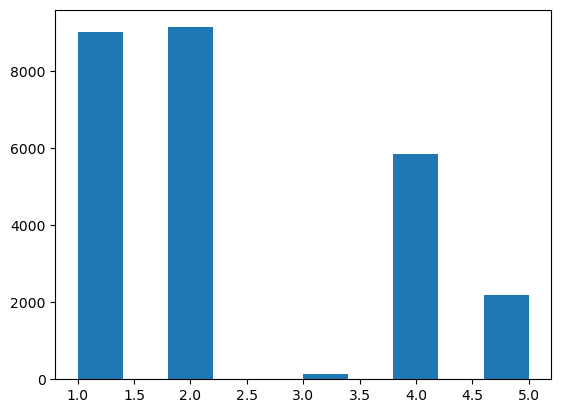

In [140]:
plt.hist("sick_from_h1n1_vacc",data=df)
plt.show()

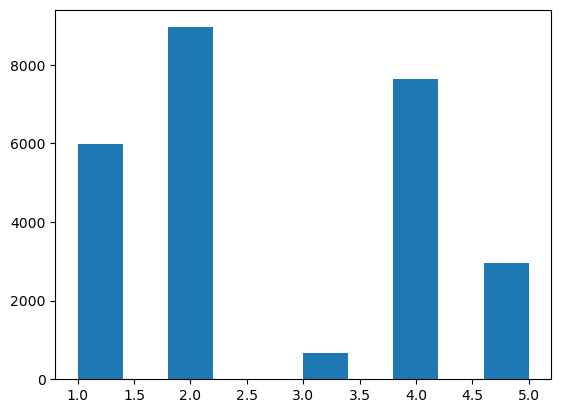

In [141]:
plt.hist("is_seas_risky",data=df)
plt.show()

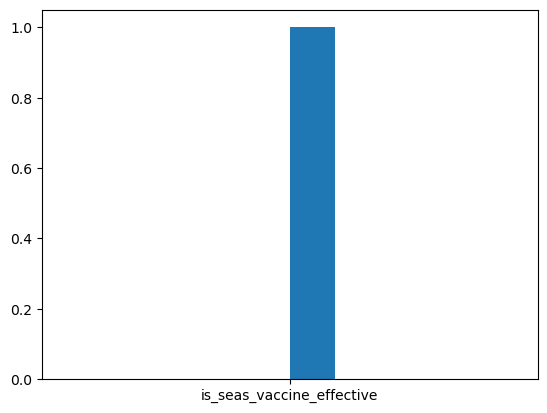

In [142]:
plt.hist("is_seas_vaccine_effective",data=df)
plt.show()

In [143]:
df.sample(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
19287,19287,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,2.0,1.0,5.0,2.0,1.0,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,1
19911,19911,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,2.0,2.0,2.0,2.0,2.0,45 - 54 Years,Some College,White,Female,NaN,Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,1
15755,15755,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,NaN,4.0,2.0,1.0,4.0,4.0,2.0,45 - 54 Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Rent,Unemployed,"MSA, Not Principle City",1.0,0.0,0
25385,25385,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,NaN,4.0,2.0,2.0,2.0,5.0,5.0,18 - 34 Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Rent,Not in Labor Force,"MSA, Not Principle City",1.0,2.0,0
16321,16321,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,2.0,4.0,4.0,2.0,1.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",3.0,0.0,1
830,830,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,3.0,2.0,1.0,45 - 54 Years,< 12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",3.0,0.0,0
13805,13805,3.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,5.0,5.0,5.0,4.0,55 - 64 Years,< 12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
6293,6293,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,2.0,2.0,4.0,2.0,1.0,18 - 34 Years,College Graduate,White,Male,"> $75,000",Not Married,Own,Employed,"MSA, Principle City",2.0,0.0,0
16229,16229,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,5.0,4.0,55 - 64 Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0
5652,5652,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,45 - 54 Years,12 Years,White,Male,NaN,Married,NaN,Employed,Non-MSA,1.0,0.0,0


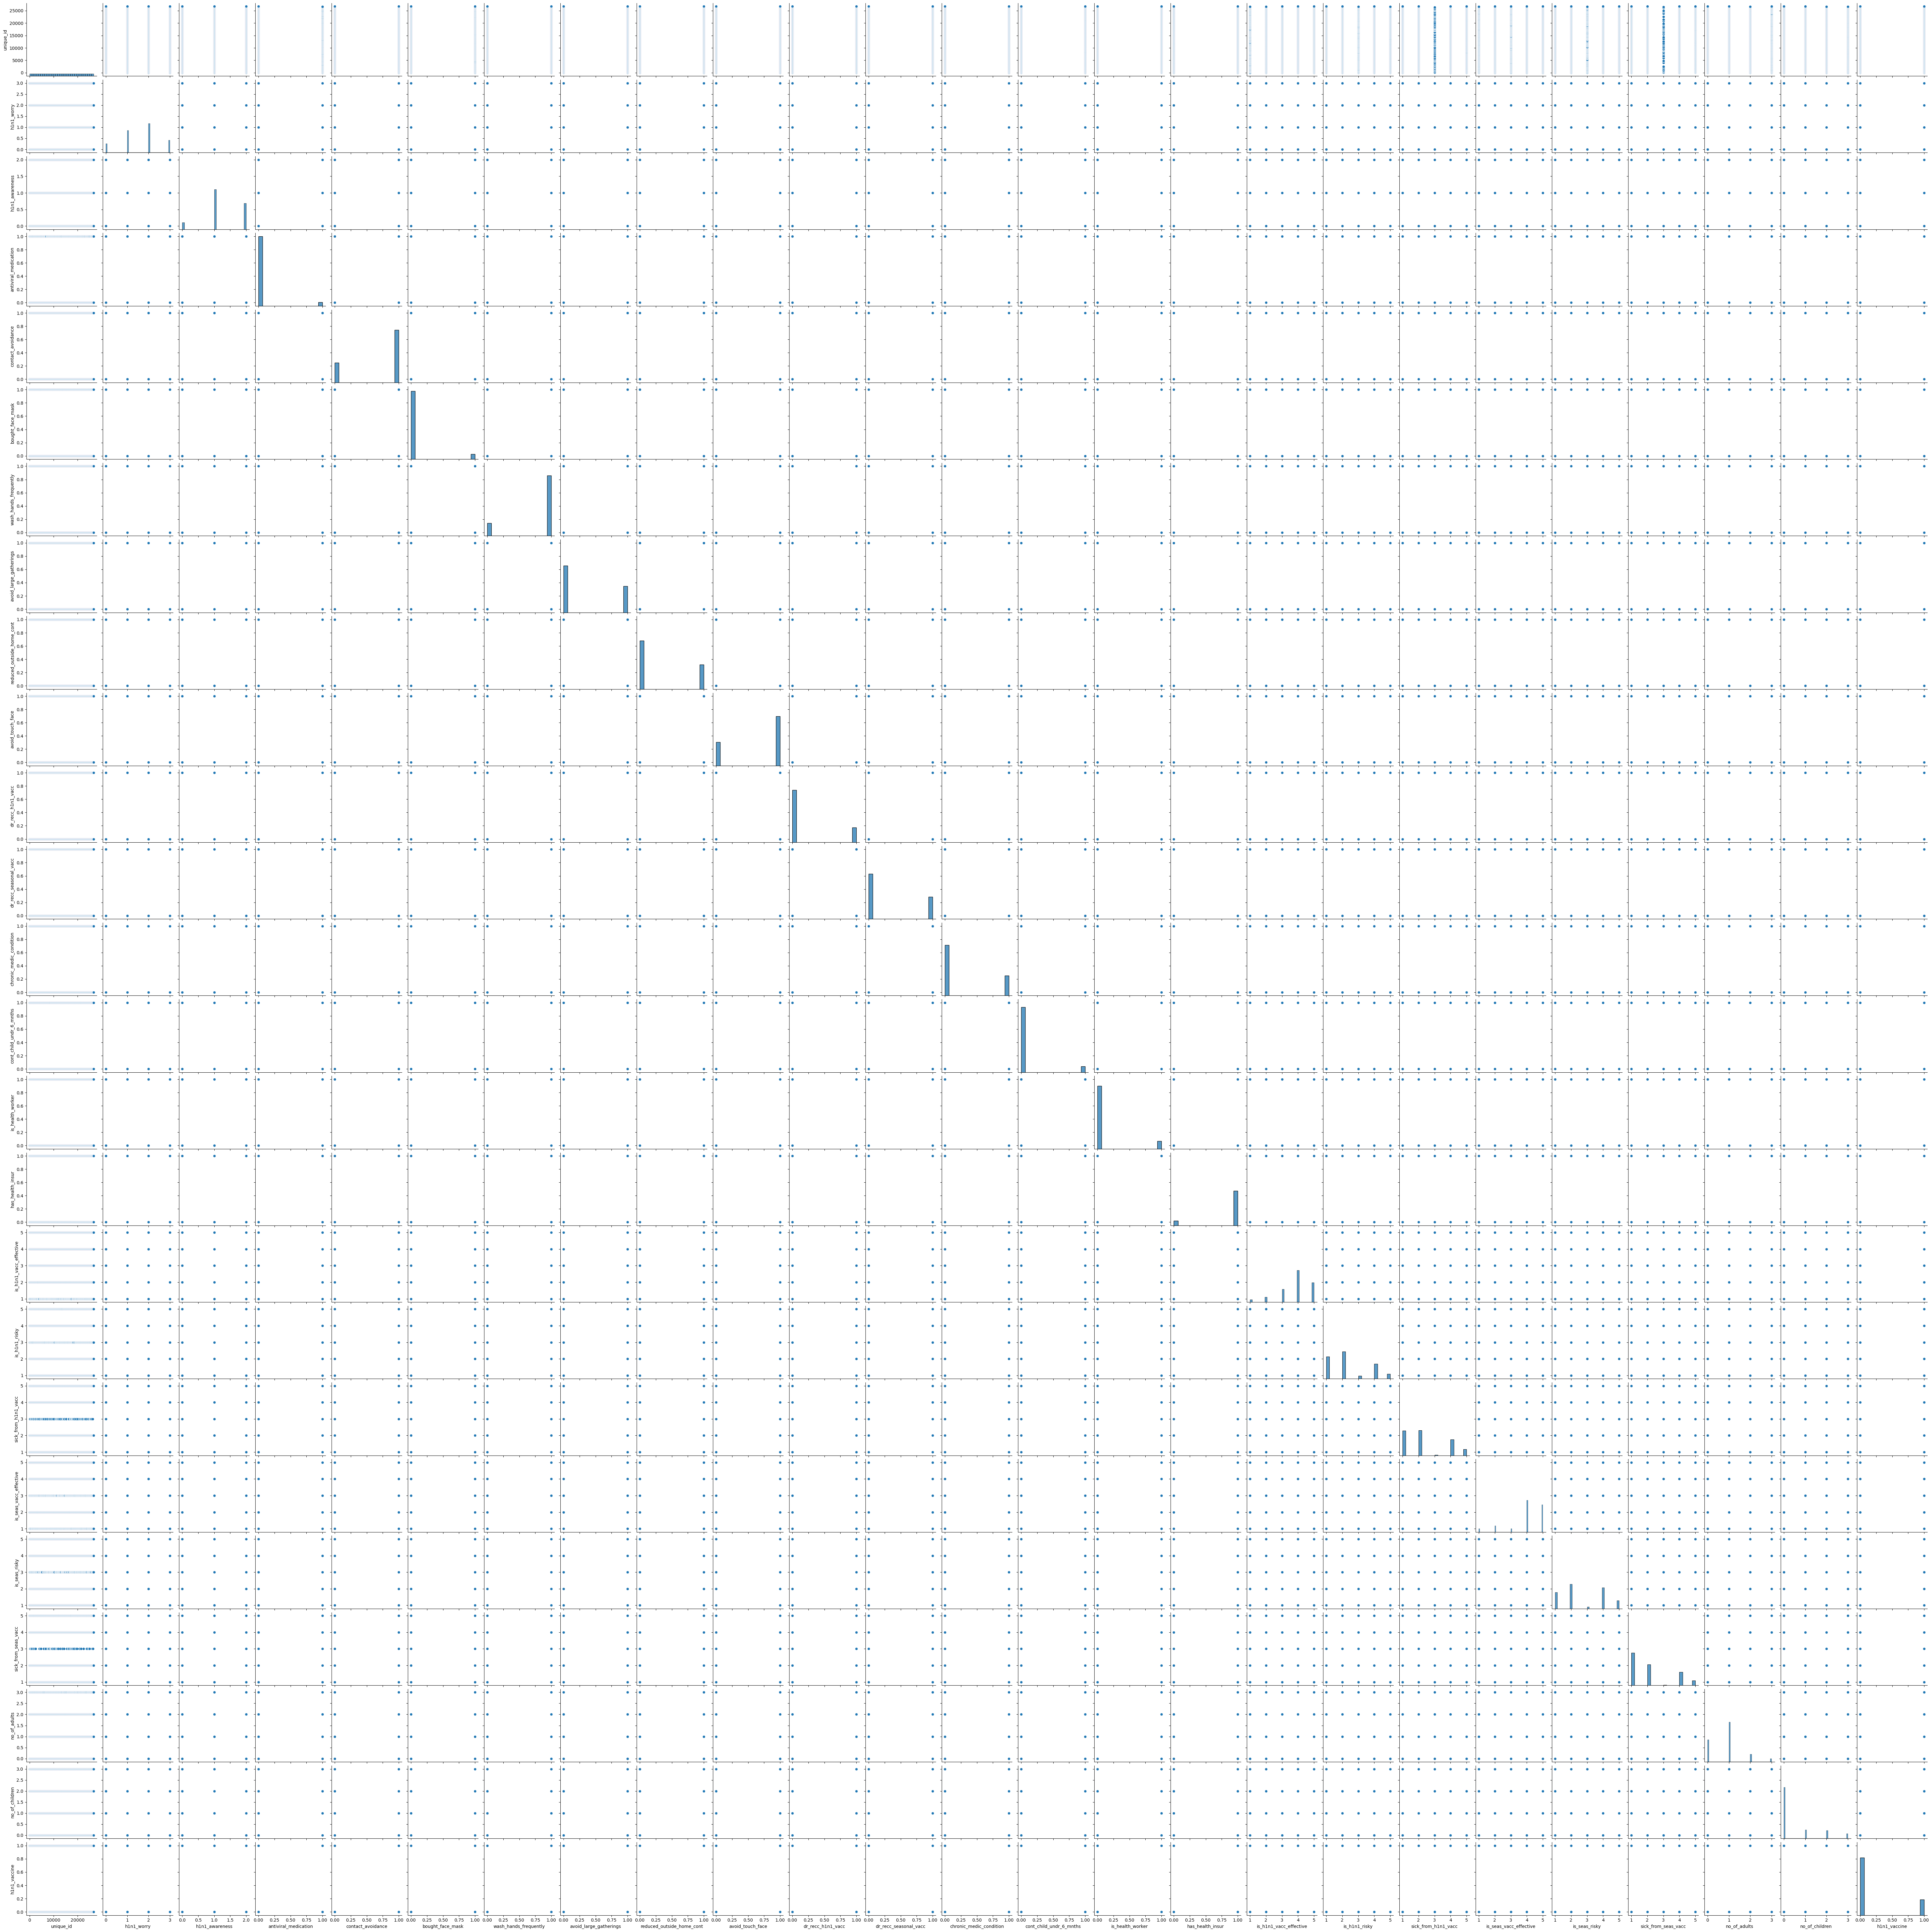

In [144]:
sns.pairplot(df)

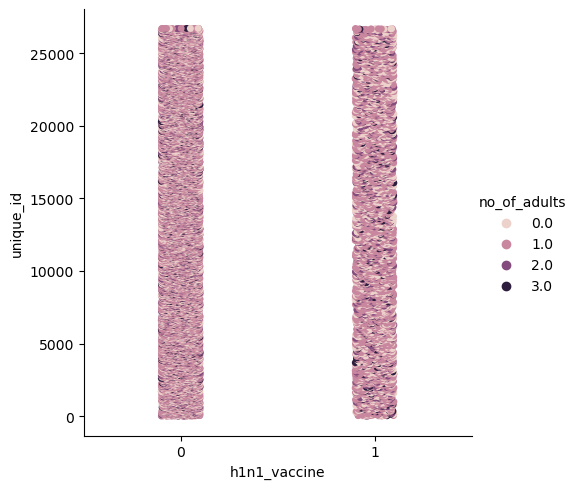

In [145]:
sns.catplot(x="h1n1_vaccine",y="unique_id",hue="no_of_adults",data=df)

In [ ]:
sns.catplot(x="h1n1_vaccine",y="unique_id",hue="no_of_adults",data=df,kind ="swarm")

In [ ]:
sns.catplot(x="h1n1_vaccine",y="unique_id",hue="no_of_adults",data=df,kind="box")

In [ ]:
sns.catplot(x="h1n1_vaccine",y="unique_id",hue="no_of_adults",data=df,kind="violin")

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.isnull().sum()

In [ ]:
df.drop(['age_bracket',"bought_face_mask","wash_hands_frequently","avoid_large_gatherings","reduced_outside_home_cont","unique_id","avoid_touch_face","chronic_medic_condition","qualification","is_health_worker","cont_child_undr_6_mnths","income_level","housing_status","employment","census_msa","race","marital_status"],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
df.dtypes

In [ ]:
df=pd.get_dummies(df,columns=["sex"])

In [ ]:
columns_mean = df[["sick_from_h1n1_vacc",'dr_recc_h1n1_vacc','no_of_children','no_of_adults','is_seas_risky','is_seas_vacc_effective','dr_recc_seasonal_vacc','has_health_insur','sick_from_seas_vacc','h1n1_vaccine','antiviral_medication','h1n1_worry','h1n1_awareness','contact_avoidance','is_h1n1_vacc_effective','is_h1n1_risky']].mean() 
df[["sick_from_h1n1_vacc",'dr_recc_h1n1_vacc','no_of_children','no_of_adults','is_seas_risky','is_seas_vacc_effective','dr_recc_seasonal_vacc','has_health_insur','sick_from_seas_vacc','h1n1_vaccine','antiviral_medication','h1n1_worry','h1n1_awareness','contact_avoidance','is_h1n1_vacc_effective','is_h1n1_risky']] = df[["sick_from_h1n1_vacc",'dr_recc_h1n1_vacc','no_of_children','no_of_adults','is_seas_risky','is_seas_vacc_effective','dr_recc_seasonal_vacc','has_health_insur','sick_from_seas_vacc','h1n1_vaccine','antiviral_medication','h1n1_worry','h1n1_awareness','contact_avoidance','is_h1n1_vacc_effective','is_h1n1_risky']].fillna(columns_mean)

In [ ]:
df.isnull().sum()

In [ ]:
X =df.drop(columns=['h1n1_vaccine'], axis=1)
y =df['h1n1_vaccine']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Logistic Regression

In [ ]:
model_0 = LogisticRegression()

In [ ]:
model_log=LogisticRegression()

In [ ]:
model_log.fit(X_train,y_train)

In [ ]:
model_log.score(X_train,y_train)

In [ ]:
model_log.score(X_test,y_test)

In [ ]:
predictions=model_log.predict(X_test)
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,predictions,labels=[1, 0])
df_cm = pd.DataFrame (cm, index = [i for i in ["1","0"]],
                      columns = [i for i in ["Predict 1","Predict 0"]])
sns.heatmap(df_cm, annot=True , fmt='g')

In [ ]:
(664+6014)/(664+1019+316+6014)

### Desision Tree Algorithm

In [ ]:
model_dtc=DecisionTreeClassifier(max_depth=6)

In [ ]:
model_dtc.fit(X_train,y_train)

In [ ]:
model_dtc.score(X_train,y_train)

In [ ]:
model_dtc.score(X_test,y_test)

### Train score and test score diffrence is less than or equal to 5% there it is a good model

## Ensemble model

1.Bagging mode:A parallel model

In [ ]:
model_bcl=BaggingClassifier(n_estimators=33,max_samples=0.1,base_estimator=model_dtc)

In [ ]:
model_bcl.fit(X_train,y_train)

In [ ]:
model_bcl.score(X_train,y_train)

In [ ]:
model_bcl.score(X_test,y_test)

2.Ada Boost Classifier

In [ ]:
model_abc=AdaBoostClassifier(n_estimators=19)

In [ ]:
model_abc.fit(X_train,y_train)

In [ ]:
model_abc.score(X_train,y_train)

In [ ]:
model_abc.score(X_test,y_test)

3.Gradient Boosting Classifier

In [ ]:
model_gbc=GradientBoostingClassifier(n_estimators=3,max_features=12)

In [ ]:
model_gbc.fit(X_train,y_train)

In [ ]:
model_gbc.score(X_train,y_train)

In [ ]:
model_gbc.score(X_test,y_test)

4.Random Forest Classfier

In [ ]:
model_rfc=RandomForestClassifier(max_depth=2,n_estimators=11)

In [ ]:
model_rfc.fit(X_train,y_train)

In [ ]:
model_rfc.score(X_train,y_train)

In [ ]:
model_rfc.score(X_test,y_test)

## Support vector algorithm

In [ ]:
model_svc=SVC(kernel='rbf',C=3.0)

In [ ]:
model_svc.fit(X_train,y_train)

In [ ]:
model_svc.score(X_train,y_train)

In [ ]:
model_svc.score(X_test,y_test)